# Unsupervised learning

Unsupervised learning is a class of machine learning techniques for discovering patterns in data. For instance, 

- **Clustering** Finding the natural "clusters" of customers based on their purchase histories
- **Dimension Reduction** searching for patterns and correlations among these purchases, and using these patterns to express the data in a compressed form.

### Supervised vs unsupervised learning

Unsupervised learning is defined in opposition to supervised learning. 

Supervised learning is using the measurements of tumors to classify them as benign or cancerous. In this case, the pattern discovery is guided, or "supervised", so that the patterns are as useful as possible for predicting the label: benign or cancerous. 

Unsupervised learning, in contrast, is learning without labels. It is pure pattern discovery, unguided by a prediction task. 

### Dataset used

The iris dataset consists of the measurements of many iris plants of three different species. There are four measurements: 
- petal length
- petal width
- sepal length
- sepal width. These are the features of the dataset. 

Throughout this course, datasets like this will be written as two-dimensional numpy arrays. The columns of the array will correspond to the features. The measurements for individual plants are the samples of the dataset. These correspond to rows of the array. 

The samples of the iris dataset have four measurements, and so correspond to points in a four-dimensional space. 

- dimension = number of features

This is the dimension of the dataset. We can't visualize four dimensions directly, but using unsupervised learning techniques we can still gain insight. 

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
iris = pd.read_csv('DataSet/iris.csv')

In [4]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#form data in an array
iris_data = iris.iloc[:, 1:5].values

# `1- ` k-means clustering

### A) Create a model

- k-means finds a specified number of clusters in the samples. 
- Number of clusters must be specified.
- It's implemented in the scikit-learn.

In [6]:
from sklearn.cluster import KMeans

In [7]:
model = KMeans(n_clusters = 3)
model.fit(iris_data)

KMeans(n_clusters=3)

We can use the predict method of the model on these same samples. This returns a cluster label for each sample, indicating to which cluster a sample belongs. 

In [8]:
iris_labels = model.predict(iris_data)
iris_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

### Cluster labels for new samples

If someone comes along with some new iris samples 
- k-means can determine to which clusters they belong without starting over. 
- k-means does this by remembering the mean (or average) of the samples in each cluster. These are called the **"centroids"**. 
- New samples are assigned to the cluster whose centroid is closest.

In [9]:
new_iris= [[5.7, 4.4, 1.5, 0.4],
             [6.5, 3, 5.5, 1.8],
            [5.8, 2.7, 5.1, 1.9]]

In [10]:
new_labels = model.predict(new_iris)
new_labels

array([0, 2, 1])

### Visualize speal length vs petal length

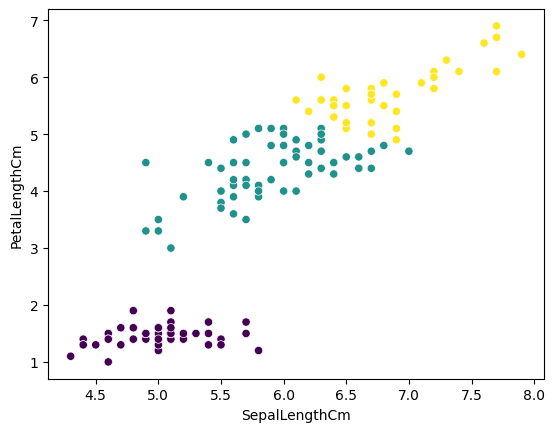

In [11]:

sns.scatterplot(data = iris, x = 'SepalLengthCm', y = 'PetalLengthCm', c = iris_labels);

In [12]:
# Assign the cluster centers: centroids
centroids = model.cluster_centers_

In [13]:
centroids

array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

- each row represent a lable
- each column represent a feature

we need first and third feature as they represent sepal length and patel length respectivily

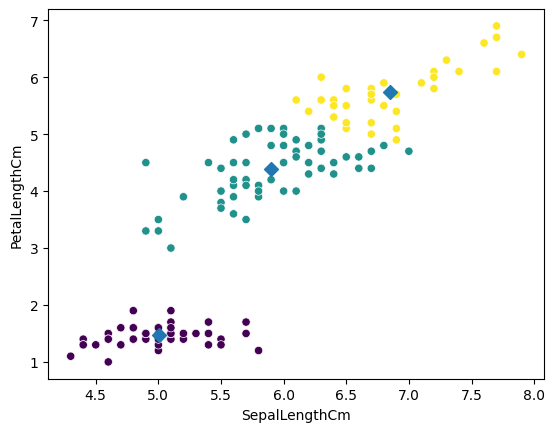

In [14]:
#visualize data with it centroize
sns.scatterplot(data = iris, x = 'SepalLengthCm', y = 'PetalLengthCm', c = iris_labels)
plt.scatter(x = centroids[:,0], y = centroids[:,2], marker = 'D', s= 50)
#plt.legend();

### B) Evaluating a clustering

A direct approach is to compare the clusters with the iris species

In [15]:
#add labels to our dataframe
iris['labels'] = iris_labels

In [16]:
#using crosstab to copare our real data with model clustring
pd.crosstab(iris['labels'], iris['Species'])

Species,Iris-setosa,Iris-versicolor,Iris-virginica
labels,,,
0,50,0,0
1,0,48,14
2,0,2,36


 Cross tabulations like these provide great insights into which sort of samples are in which cluster. 
 
 But in most datasets, the samples are not labelled by species. How can the quality of a clustering be evaluated in these cases? 

We need a way to measure the quality of a clustering that 

- uses only the clusters and the samples themselves. 
- A good clustering has tight clusters
- The samples in each cluster are bunched together, not spread out. 

Inertia measures clustering quality

- How spread out the samples within each cluster are can be measured by the "inertia". Intuitively, 
- inertia measures how far samples are from their centroids.  lower values of the inertia are better. 
- The inertia of a kmeans model is measured automatically when any of the fit methods are called, and is available afterwards as the inertia attribute. 
- In fact, kmeans aims to place the clusters in a way that minimizes the inertia. 

In [17]:
model.inertia_

78.940841426146

### The number of clusters

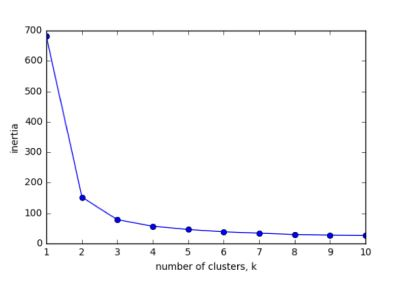

Here is a plot of the inertia values of clusterings of the iris dataset with different numbers of clusters. 

Our kmeans model with 3 clusters has relatively low inertia, which is great. But notice that the inertia continues to decrease slowly. So what's the best number of clusters to choose?

Ultimately, this is a trade-off. A good clustering has tight clusters (meaning low inertia). But it also doesn't have too many clusters. 

A good rule of thumb is to choose an **elbow** in the inertia plot, that is, a point where the inertia begins to decrease more slowly. 

For example, by this criterion, 3 is a good number of clusters for the iris dataset

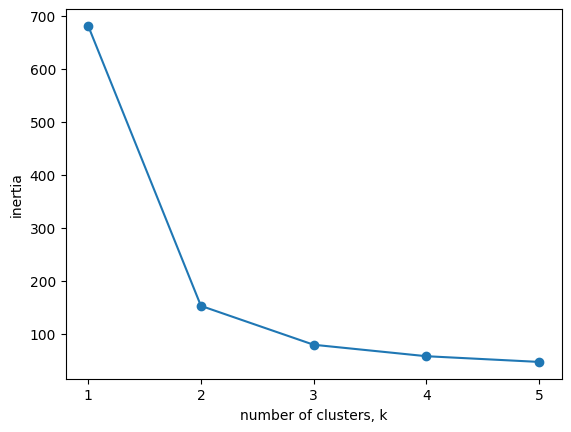

In [18]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters = k)
    
    # Fit model to samples
    model.fit(iris_data)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

### C) Transforming features for better cluster

we will use the Piedmont wines dataset. 

- We have 178 samples of red wine from the Piedmont region of Italy.
- The features measure chemical composition (like alcohol content) and visual properties like color intensity. 
- The samples come from 3 distinct varieties of wine (Barolo, Grignolino and Barbera)

In [19]:
wine = pd.read_csv('DataSet/wine.csv')

In [20]:
wine.head()

,class_label,class_name,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1,Barolo,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,Barolo,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,Barolo,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,Barolo,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,Barolo,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [21]:
wine['class_name'].unique()

array(['Barolo', 'Grignolino', 'Barbera'], dtype=object)

In [22]:
wine_sample = wine.drop(['class_label', 'class_name'],axis = 1).values
wine_sample

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [23]:
from sklearn.cluster import KMeans

In [24]:
model = KMeans(n_clusters = 3)
model.fit(wine_sample)

KMeans(n_clusters=3)

In [25]:
#generate labels
wine_labels = model.predict(wine_sample)

In [26]:
#check quailty using cross-tab
wine['model_labels'] = wine_labels
pd.crosstab(wine['model_labels'], wine['class_name'])

class_name,Barbera,Barolo,Grignolino
model_labels,,,
0,29,13,20
1,19,0,50
2,0,46,1


**As you can see, this time things haven't worked out so well. The KMeans clusters don't correspond well with the wine varieties.**

### Feature variances
The problem is that the features of the wine dataset have very different variances. The variance of a feature measures the spread of its values. 

For example, the malic acid feature has a higher variance 

In [27]:
wine.describe()

,class_label,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline,model_labels
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.915730
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.780178
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


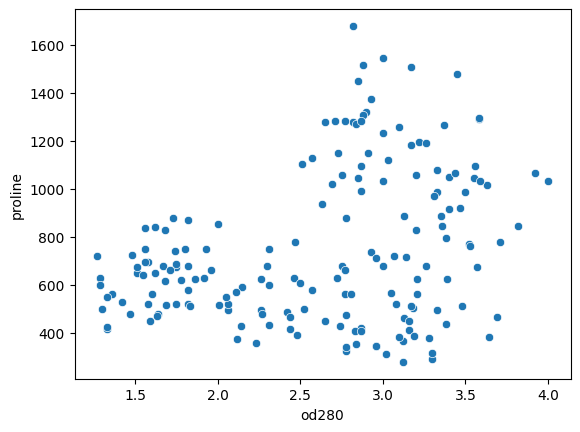

In [28]:
sns.scatterplot(data = wine, x ='od280', y ='proline');

The differences in some of the feature variances is enormous for example, in the scatter plot of the od280 and proline features. 

''

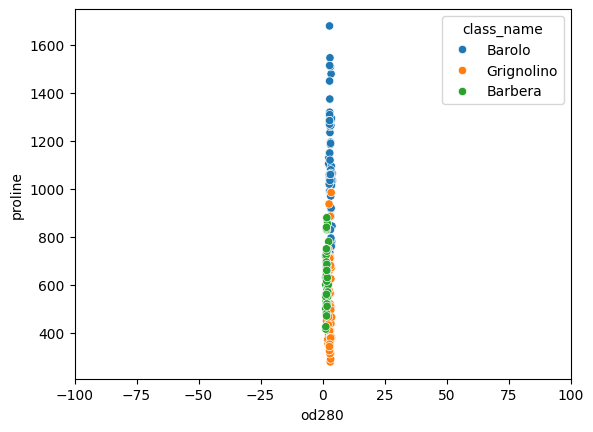

In [29]:
sns.scatterplot(data = wine, x ='od280', y ='proline', hue = 'class_name')
plt.xlim (-100,100)

;

### StandardScaler


In KMeans clustering, the variance of a feature corresponds to its influence on the clustering algorithm. To give every feature a chance, the data needs to be transformed so that features have equal variance. 

- This can be achieved with the StandardScaler from scikit-learn. 
- It transforms every feature to have mean 0 and variance 1. 
- The resulting "standardized" features can be very informative. 

#Using standardized od280 and proline, for example, the three wine varieties are much more distinct. 

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()
scaler.fit(wine_sample)

StandardScaler()

In [32]:
#use the model to standardize the samples
scaled_wine_sample = scaler.transform(wine_sample)

In [33]:
scaled_wine_sample

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

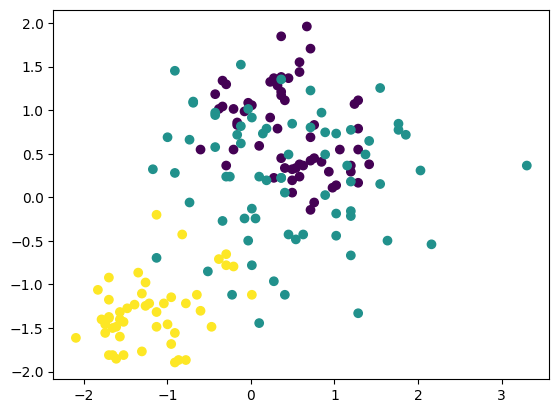

In [34]:
plt.scatter(x = scaled_wine_sample[:,10], y = scaled_wine_sample[:, 11], c = wine['class_label']);

After scaleing the data the three wine varieties are much more distinct. 

### Similar methods

The APIs of StandardScaler and KMeans are similar, but there is an important difference. 

- StandardScaler transforms data, and so has a transform method. 
- KMeans, in contrast, assigns cluster labels to samples, and this done using the predict method. 

In [35]:
### repeate the clustring after scaleing the data
model.fit(scaled_wine_sample)
scaled_wine_labels = model.predict(scaled_wine_sample)

In [36]:
scaled_wine_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [37]:
wine['scaled_wine_labels'] = scaled_wine_labels

In [38]:
pd.crosstab(wine['scaled_wine_labels'], wine['class_name'])

class_name,Barbera,Barolo,Grignolino
scaled_wine_labels,,,
0,0,59,3
1,48,0,3
2,0,0,65


**ts three clusters correspond almost exactly to the three wine varieties. This is a huge improvement on the clustering without standardization.**

### Using pipeline

- Used to combining the two steps using a scikit-learn pipeline. 
- Data then flows from one step into the next, automatically. 

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

In [40]:
scaler = StandardScaler()
kmeans = KMeans(n_clusters = 3)
pipeline = make_pipeline(scaler, kmeans)

In [41]:
#fit the pipeline with wine samples
pipeline.fit(wine_sample)

pipeline_scaled_wine_labels = pipeline.predict(wine_sample)

#### StandardScaler is an example of a "preprocessing" step. 

There are several of these available in scikit-learn, for example **MaxAbsScaler** and **Normalizer**. 

# `2-` Visualizing hierarchies

A huge part of your work as a data scientist will be the communication of your insights to other people. 

We'll learn about two unsupervised learning techniques for visualization: 

- Hierarchical clustering
    - Arranges samples into a hierarchy of clusters. 
- t-SNE : creates a 2D map of any dataset
    - Conveys useful information about the proximity of the samples to one another. 


### A) Hierarchy clustering

For example, living things can be organized into small narrow groups, like humans, apes, snakes and lizards, or into larger, broader groups like mammals and reptiles, or even broader groups like animals and plants.

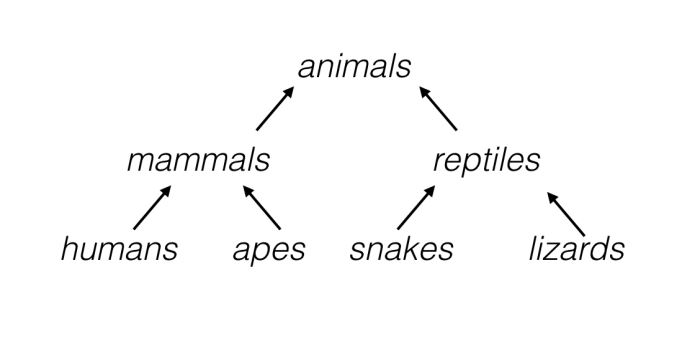

**Hierarchical Clustering** can organize any sort of data into a hierarchy, not just samples of plants and animals. 

Let's consider a new type of dataset
- Countries scored performances at the Eurovision 2016 song contest. 
- The data is arranged in a rectangular array (2D).
- Rows of the array show how many points a country gave to each song. The "samples" in this case are the countries.
- Columns are songs

The result of applying hierarchical clustering to the Eurovision scores can be visualized as a tree-like diagram called a **"dendrogram"**. 

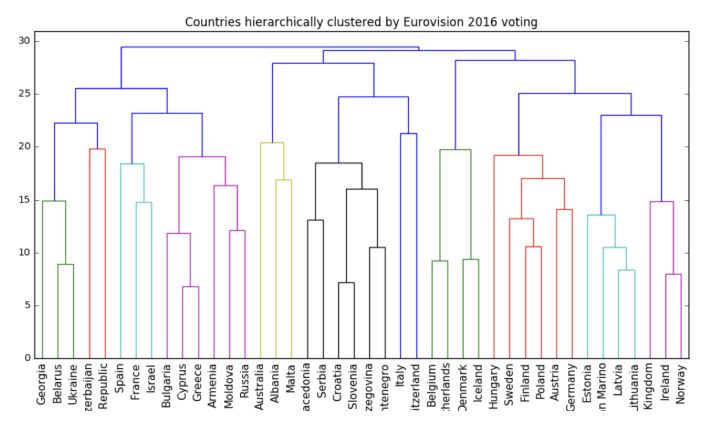

This single picture reveals a great deal of information about the voting behavior of countries at the Eurovision. The dendrogram groups the countries into larger and larger clusters, and many of these clusters are immediately recognizable as
- countries that are close to one another geographically, 
- countries that have close cultural or political ties, 
- countries that belong to single language group. 

So hierarchical clustering can produce great visualizations. **But how does it work?**

**Hierarchical clustering proceeds in steps.**

- In the beginning, every country is its own cluster - so there are as many clusters as there are countries! 
- At each step, the two closest clusters are merged. This decreases the number of clusters, 
- Continue until there is only one cluster left, and it contains all the countries. 
- This process is actually a particular type of hierarchical clustering called "agglomerative clustering" - 

There is also "divisive clustering", which works the other way around. We haven't defined yet what it means for two clusters to be close, but we'll revisit that later on.

#### Dendrograms, step-by-step

look at just one part of this dendrogram which contains (Bulgaria, Cyprus, Greece, Armenia, Moldova and Russia)

- In the beginning, there are six clusters, each containing only one country.
- The first merging is here, where the clusters containing Cyprus and Greece are merged together in a single cluster.
- Later on, this new cluster is merged with the cluster containing Bulgaria.
- Shortly after that, the clusters containing Moldova and Russia are merged,
- which later is in turn merged with the cluster containing Armenia.
- Later still, the two big composite clusters are merged together. 
- This process continues until there is only one cluster left, and it contains all the countries. 

In [42]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [43]:
#get data
eurovision = pd.read_csv('DataSet/eurovision-2016.csv')
eurovision.head()

,From country,To country,Jury A,Jury B,Jury C,Jury D,Jury E,Jury Rank,Televote Rank,Jury Points,Televote Points
0,Albania,Belgium,20,16,24,22,24,25,14,NaN,NaN
1,Albania,Czech Republic,21,15,25,23,16,22,22,NaN,NaN
2,Albania,The Netherlands,22,14,23,24,21,24,24,NaN,NaN
3,Albania,Azerbaijan,19,12,11,21,11,13,19,NaN,NaN
4,Albania,Hungary,8,13,9,14,9,10,10,1.0,1.0


In [44]:
#take sample
eurovision_sample = eurovision.sample(70, random_state = 30)

In [45]:
#select numerical columns you need and makesure no NAN values in your data
euro_samples = eurovision_sample.fillna(0).iloc[:, 2:].values
#samples

In [46]:
#select the countries from your sample
countries = eurovision_sample.iloc[:,0].values
countries

array(['Lithuania', 'Albania', 'Lithuania', 'The Netherlands', 'Germany',
       'Montenegro', 'Serbia', 'Cyprus', 'Serbia', 'Albania', 'Estonia',
       'F.Y.R. Macedonia', 'Azerbaijan', 'Denmark', 'Belarus', 'Austria',
       'Montenegro', 'Estonia', 'Germany', 'The Netherlands', 'Malta',
       'Spain', 'The Netherlands', 'F.Y.R. Macedonia', 'Georgia',
       'United Kingdom', 'Croatia', 'Montenegro', 'Belgium', 'Slovenia',
       'Switzerland', 'Croatia', 'Israel', 'Israel', 'Spain', 'Ukraine',
       'Finland', 'Serbia', 'Estonia', 'F.Y.R. Macedonia', 'Malta',
       'San Marino', 'Belarus', 'Finland', 'Belarus', 'Latvia', 'Hungary',
       'Belarus', 'Albania', 'Hungary', 'Malta', 'United Kingdom',
       'Sweden', 'Belgium', 'Israel', 'Sweden', 'Bulgaria', 'Israel',
       'Switzerland', 'Lithuania', 'Iceland', 'France', 'Greece',
       'Switzerland', 'Estonia', 'Russia', 'Lithuania', 'Slovenia',
       'Hungary', 'Norway'], dtype=object)

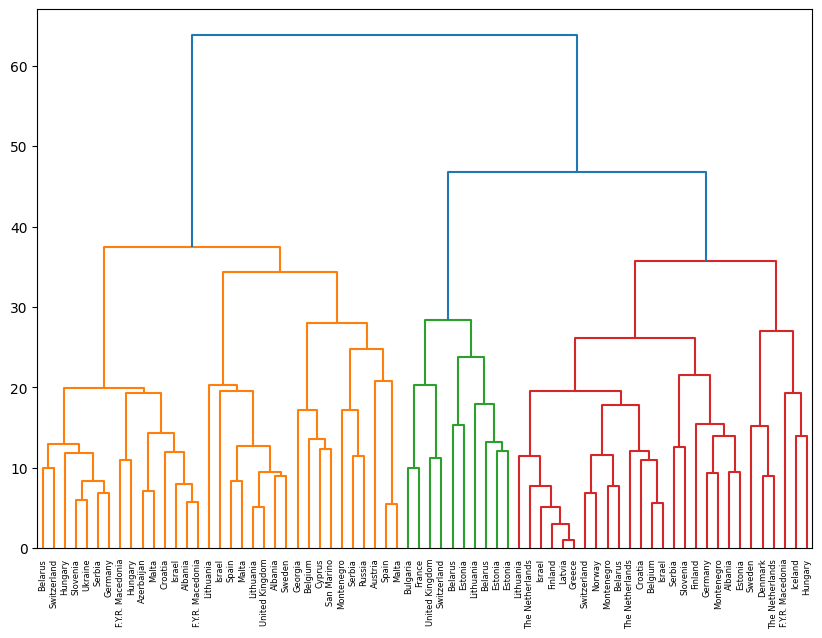

In [47]:
#apply the linkage function to the sample array
#Its the linkage function that performs the hierarchical clustering
euro_mergings = linkage(euro_samples, method = 'complete')
plt.figure(figsize = (10,7))
#pass the output of linkage to the dendrogram function, specifying the list of country names as the labels parameter
dendrogram(euro_mergings,
          labels=countries,
           leaf_rotation=90,
           leaf_font_size=6,)

plt.show()

**SciPy hierarchical clustering** doesn't fit into a sklearn pipeline, so you'll need to use the normalize() function from sklearn.preprocessing instead of Normalizer.

In [48]:
from sklearn.preprocessing import normalize

In [49]:
wine.head()

,class_label,class_name,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline,model_labels,scaled_wine_labels
0,1,Barolo,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2,0
1,1,Barolo,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2,0
2,1,Barolo,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2,0
3,1,Barolo,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2,0
4,1,Barolo,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0,0


In [50]:
#take sample of wine data
wine_sample_df = wine.sample(60, random_state = 50)


In [51]:
#get array of features values
wine_sample_2 = wine_sample_df.drop(['class_label', 'class_name', 'model_labels','scaled_wine_labels'],axis = 1).values
#get array of wine name
wine_labels_2 = wine_sample_df['class_name'].values

In [52]:
# Normalize the movements: normalized_movements
normalized_wine_sample =normalize(wine_sample_2)

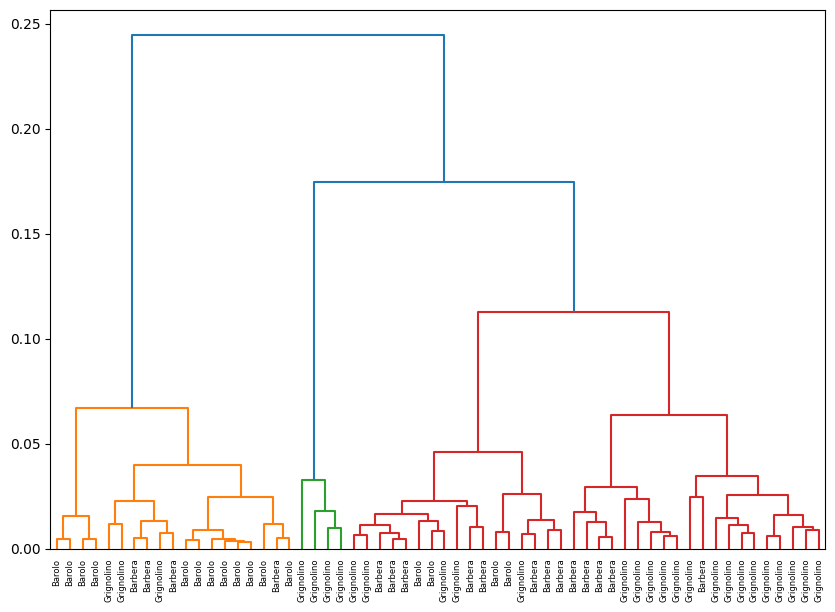

In [53]:
normalized_wine_mergings = linkage(normalized_wine_sample, method = 'complete')

plt.figure(figsize = (10,7))
# Plot the dendrogram
dendrogram( normalized_wine_mergings,
            labels = wine_labels_2,
            leaf_rotation = 90,
            leaf_font_size = 6
            )
plt.show()

In [54]:
euro_normalized_sample =normalize(euro_samples)

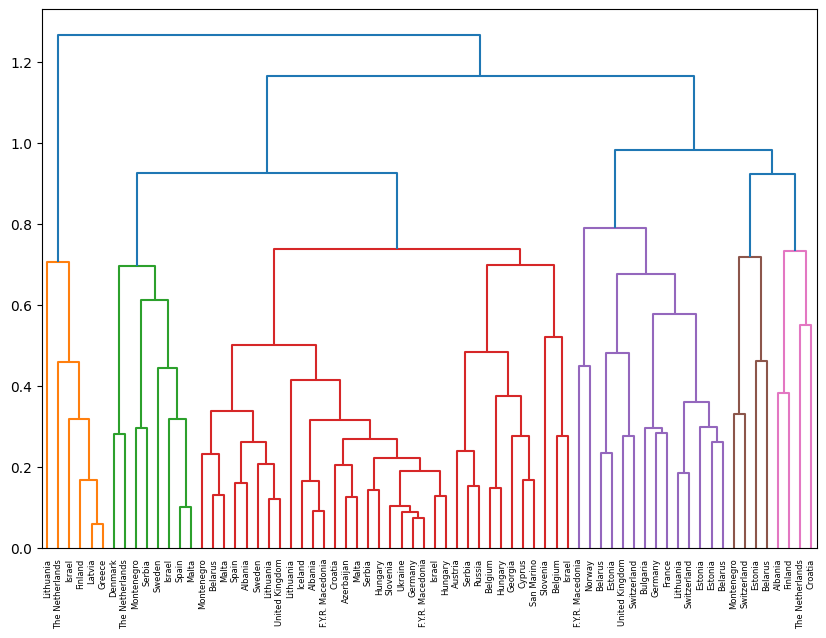

In [55]:
euro_normalized_mergings = linkage(euro_normalized_sample, method = 'complete')

plt.figure(figsize = (10,7))
# Plot the dendrogram
dendrogram( euro_normalized_mergings,
            labels = countries,
            leaf_rotation = 90,
            leaf_font_size = 6
            )
plt.show()

### Cluster labels in hierarchical clustering

- Hierarchical clustering is not only a visualization tool.
- We can extract the clusters from intermediate stages of a hierarchical clustering. 
- The cluster labels for these intermediate clusterings can then be used in further computations, such as cross tabulations, just like the cluster labels from k-means. 

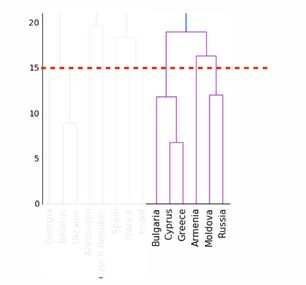

An intermediate stage in the hierarchical clustering is specified by choosing a height on the dendrogram. 

**For example,** choosing a height of 15 defines a clustering in which 
- Bulgaria, Cyprus and Greece are in one cluster.
- Russia and Moldova are in another.
- Armenia is in a cluster on its own. 

But what is the meaning of the height?

**The y-axis of the dendrogram = the distance between merging clusters.** For example, 

- The distance between the cluster containing Cyprus and the cluster containing Greece was approximately 6 when they were merged into a single cluster. 

- When this new cluster was merged with the cluster containing Bulgaria, the distance between them was 12. 

#### Distance between  clusters

- Is defined and measured using a "linkage method". 
- We used "complete" linkage, where the distance between two clusters is the maximum of the distances between their samples. 
- This was specified via the "method" parameter. 
- There are many other linkage methods, and you'll see in the exercises that different linkage methods give different hierarchical clusterings! 

#### Extracting cluster labels

The cluster labels for any intermediate stage of the hierarchical clustering can be extracted using the fcluster function. 

After performing the hierarchical clustering of the Eurovision data, import the fcluster function. Then pass the result of the linkage function to the fcluster function, specifying the height as the second argument. This returns a numpy array containing the cluster labels for all the countries. 

In [56]:
from scipy.cluster.hierarchy import fcluster

In [57]:
cluster_labels = fcluster (euro_mergings, 33, criterion='distance')

In [58]:
print(cluster_labels)

[2 5 4 5 5 5 3 3 1 1 4 6 1 6 4 3 3 4 1 5 1 2 6 1 3 2 1 5 3 1 5 5 1 5 3 1 5
 5 5 1 3 3 4 5 5 5 1 1 2 1 2 4 2 5 5 6 4 2 4 5 6 4 5 1 4 3 2 5 6 5]


To inspect cluster labels, let's use a DataFrame to align the labels with the country names. Firstly, import pandas, then create the data frame, and then sort by cluster label, printing the result. As expected, the cluster labels group Bulgaria, Greece and Cyprus in the same cluster. But do note that the scipy cluster labels start at 1, not at 0 like they do in scikit-learn. 

In [59]:
country_cluster_pairs = pd.DataFrame({'labels' : cluster_labels, 'countury': countries})

In [60]:
country_cluster_pairs.head()

,labels,countury
0,2,Lithuania
1,5,Albania
2,4,Lithuania
3,5,The Netherlands
4,5,Germany


In [61]:
country_cluster_pairs['labels'].value_counts()

labels
5    21
1    15
4    10
3    10
2     8
6     6
Name: count, dtype: int64

In [62]:
country_cluster_pairs.sort_values('labels')

,labels,countury
46,1,Hungary
23,1,F.Y.R. Macedonia
29,1,Slovenia
20,1,Malta
32,1,Israel
...,...,...
60,6,Iceland
11,6,F.Y.R. Macedonia
13,6,Denmark
22,6,The Netherlands


In [63]:
# Create crosstab: ct
ct = pd.crosstab(country_cluster_pairs['labels'], country_cluster_pairs['countury'])
ct


countury,Albania,Austria,Azerbaijan,Belarus,Belgium,Bulgaria,Croatia,Cyprus,Denmark,Estonia,...,Russia,San Marino,Serbia,Slovenia,Spain,Sweden,Switzerland,The Netherlands,Ukraine,United Kingdom
labels,,,,,,,,,,,,,,,,,,,,,
1,1,0,1,1,0,0,1,0,0,0,...,0,0,1,1,0,0,1,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
3,0,1,0,0,1,0,0,1,0,0,...,1,1,1,0,1,0,0,0,0,0
4,0,0,0,2,0,1,0,0,0,3,...,0,0,0,0,0,0,1,0,0,1
5,1,0,0,1,1,0,1,0,0,1,...,0,0,1,1,0,0,1,2,0,0
6,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0


#### Same Example for wine

In [64]:
#get array of features values
wine_sample_2 = wine_sample_df.drop(['class_label', 'class_name', 'model_labels','scaled_wine_labels'],axis = 1).values
#get array of wine name
wine_labels_2 = wine_sample_df['class_name'].values

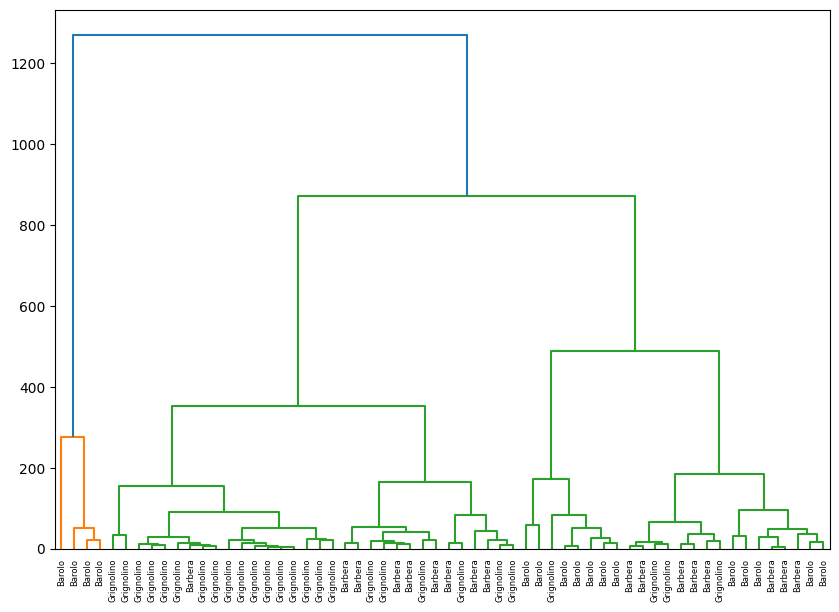

In [65]:
wine_mergings_2 = linkage(wine_sample_2, method = 'complete')

plt.figure(figsize = (10,7))
# Plot the dendrogram
dendrogram( wine_mergings_2,
            labels = wine_labels_2,
            leaf_rotation = 90,
            leaf_font_size = 6
            )
plt.show()

In [66]:
wine_cluster_labels = fcluster (wine_mergings_2, 400, criterion='distance')

wine_cluster_pairs = pd.DataFrame({'labels' : wine_cluster_labels, 'wine': wine_labels_2})
wine_cluster_pairs.sort_values('labels')
# Create crosstab: ct
ct = pd.crosstab(wine_cluster_pairs['labels'], wine_cluster_pairs['wine'])
ct

wine,Barbera,Barolo,Grignolino
labels,,,
1,0,4,0
2,9,0,23
3,0,7,1
4,8,5,3


### B) t-SNE for 2-dimensional maps

- **t-SNE** stands for "t-distributed stochastic neighbor embedding
- It maps samples from their high-dimensional space into a 2D or 3D space so they can visualized. 
- Map approximately preserves nearness of samples. 
- t-SNE is an invaluable visual aid for understanding a dataset. 

**Back to Iris dataset**
- has 4 measurements, so samples are 4-dimensional
- t-SNE maps samples to 2D space
- t-SNE didn't know that there were different species
- But if we color the species differently on the scatter plot, we see that t-SNE has kept the species separate. 

In [67]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,labels
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [68]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [69]:
iris_dict = {'Iris-setosa': 1, 'Iris-versicolor': 2, 'Iris-virginica':3}

In [70]:
iris['Species_code'] = iris['Species'].map(iris_dict)

In [71]:
#form data in an array
iris_data = iris.iloc[:, 1:5].values


In [72]:
# Import TSNE
from sklearn.manifold import TSNE

####  t-SNE has only fit_transform()

- t-SNE only has a fit_transform method. 
- simultaneously fits the model and transforms the data. 
- However, t-SNE does not have separate fit and transform methods. 
- This means that you can't extend a t-SNE map to include new samples. 
- Instead, **you have to start over each time.**

#### t-SNE learning rate

- You may need to try different learning rates for different datasets. 
- It is clear, however, when you've made a bad choice, because all the samples appear bunched together in the scatter plot. 
- Normally it's enough to try a few values between 50 and 200. 

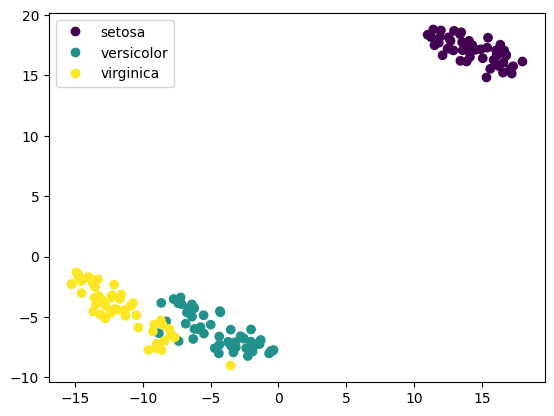

In [73]:
# Create a TSNE instance: model
tsne_model = TSNE(learning_rate = 100)

# Apply fit_transform to samples: tsne_features
tsne_features = tsne_model.fit_transform(iris_data)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
scatter = plt.scatter(xs, ys, c= iris['Species_code'])
plt.legend(handles=scatter.legend_elements()[0], labels=['setosa', 'versicolor', 'virginica'])
plt.show()


This scatter plot gives us a new insight, however. We learn that there are two iris species, versicolor and virginica, whose samples are close together in space. So it could happen that the iris dataset appears to have two clusters, instead of three. 

This is compatible with our previous examples using k-means, where we saw that a clustering with 2 clusters also had relatively low inertia, meaning tight clusters. 

#### A final thing to be aware of 

- The axes of a t-SNE plot do not have any interpretable meaning. 
- In fact, they are different every time t-SNE is applied, even on the same data. 
- But, clusters have the same position relative to one another. 

# `3-` Dimension reduction

- Dimension reduction finds patterns in data, and uses these patterns to re-express it in a compressed form. 
- More efficient storage and computation. 
- The most important function of dimension reduction is remove less-informative 'noise' features
- Discarding noisy features that cause big problems for supervised learning tasks like regression and classification. 
- In many real-world applications, it's dimension reduction that makes prediction possible. 

### Principal Component Analysis

- PCA = "Principal Component Analysis"
- Fundamental dimension reduction technique
- First step "decorrelation". doesn't change the dimension of the data at all.(considered here)
- Second step reduces dimension (considered later)


### A) Decorrelation
- PCA rotates the samples so that they are aligned with the coordinate axes. 
- In fact, it does more than this: PCA also shifts the samples so that they have mean zero. 
- No information is lost
    
These scatter plots show the effect of PCA applied to two features of the wine dataset. Notice that no information is lost - this is true no matter how many features your dataset has.

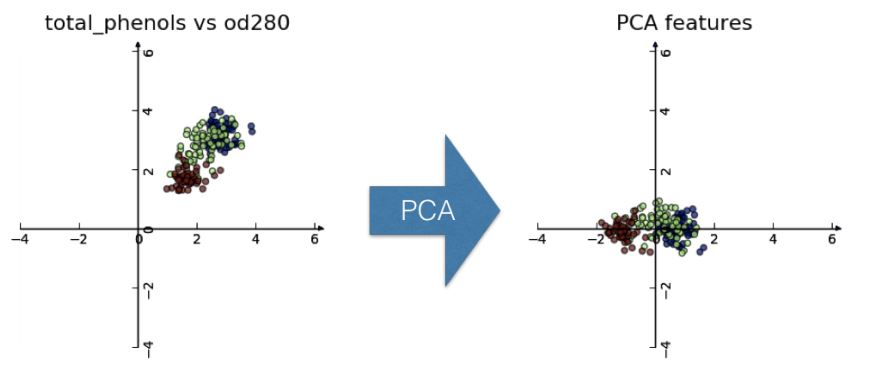

In [74]:
wine[['total_phenols', 'od280']].head()

,total_phenols,od280
0,2.80,3.92
1,2.65,3.40
2,2.80,3.17
3,3.85,3.45
4,2.80,2.93


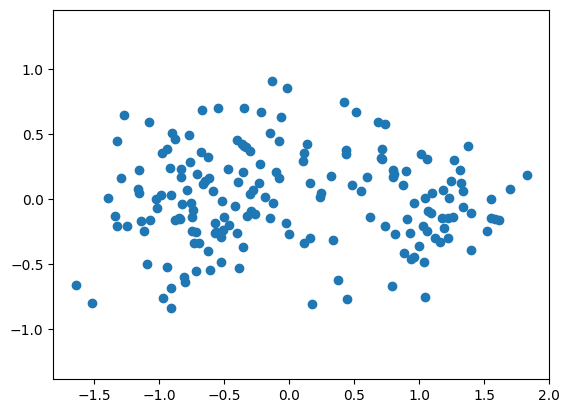

-1.734723475976807e-18


In [75]:
# Import PCA
from sklearn.decomposition import PCA
from scipy.stats import pearsonr

# Create PCA instance: model
pca_model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = pca_model.fit_transform(wine[['total_phenols', 'od280']])

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)

#### Principal components

- PCA is called "principal component analysis" because it learns the "principal components" of the data. 
- These are the directions in which the samples vary the most, depicted here in red. 
- It is the principal components that PCA aligns with the coordinate axes.

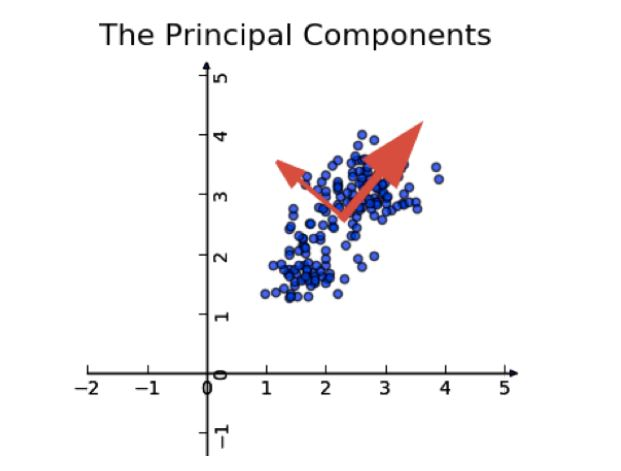

- After a PCA model has been fit, the principal components are available as the components attribute. 
- This is numpy array with one row for each principal component. 

In [76]:
pca_model.components_

array([[-0.64116665, -0.76740167],
       [-0.76740167,  0.64116665]])

array([2.29511236, 2.61168539])

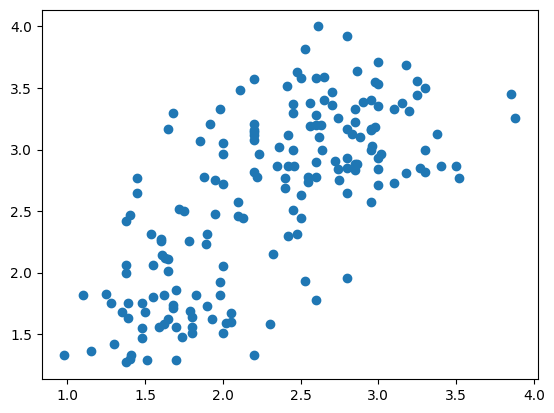

In [77]:
# Make a scatter plot of the untransformed points
plt.scatter(wine['total_phenols'],wine['od280'])

# Create a PCA instance: model
pca_model = PCA()

# Fit model to points
pca_model.fit(wine[['total_phenols', 'od280']])

# Get the mean of the wine samples: mean
mean = pca_model.mean_
mean

In [78]:
pca_model.components_[0]

array([-0.64116665, -0.76740167])

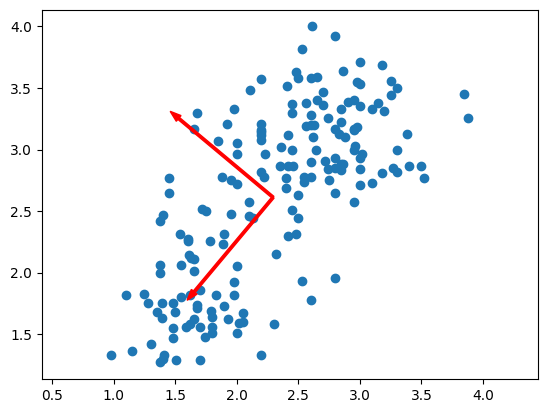

In [79]:
# Get the first principal component: first_pc
first_pc = pca_model.components_[0,:]
second_pc = pca_model.components_[1,:]

plt.scatter(wine['total_phenols'],wine['od280'])
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.02)
plt.arrow(mean[0], mean[1], second_pc[0], second_pc[1], color='red', width=0.02)

# Keep axes on same scale
plt.axis('equal')
plt.show()

### B) Intrinsic dimension

- The intrinsic dimension of a dataset is the number of features required to approximate it. 
- Essential idea behind dimension reduction
- It tells us how much a dataset can be compressed. 
- Can be detected with PC

Consider this dataset with 2 features: latitude and longitude. 

- These two features might track the flight of an airplane 
- This dataset is 2-dimensional, yet it turns out that it can be closely approximated using only one feature
- The displacement along the flight path. This dataset is intrinsically one-dimensional. 

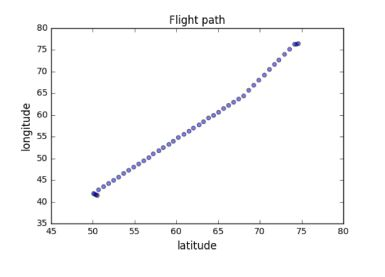

Let's take three measurements from the iris versicolor samples: sepal length, sepal width, and petal width. 

In [80]:
irsi_pca = iris[iris['Species'] == 'Iris-versicolor'][['SepalLengthCm','SepalWidthCm','PetalWidthCm']]

In [81]:
irsi_pca.head()

,SepalLengthCm,SepalWidthCm,PetalWidthCm
50,7.0,3.2,1.4
51,6.4,3.2,1.5
52,6.9,3.1,1.5
53,5.5,2.3,1.3
54,6.5,2.8,1.5


 - So each sample is represented as a point in 3-dimensional space. 

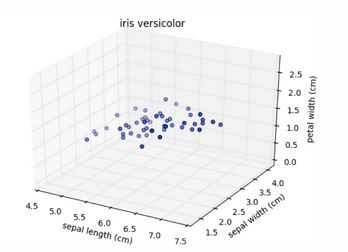

- However, if we make a 3d scatter plot of the samples,
- we see that they all lie very close to a flat, 2-dimensional sheet. 
- This means that the data can be approximated by using only two coordinates, without losing much information. 
- So this dataset has intrinsic dimension 2. 

#### PCA identifies intrinsic dimension
- Scatter plots work only if samples have 2 or 3 feautres
- PCA identifies intrinsic dimension when samples have any number of featrues
- intrinsic dimension = number of PCA features with significant variance

let's see what happens when PCA is applied to the dataset of versicolor samples. 

- PCA rotates and shifts the samples to align them with the coordinate axes. 
- This expresses the samples using three PCA features. 

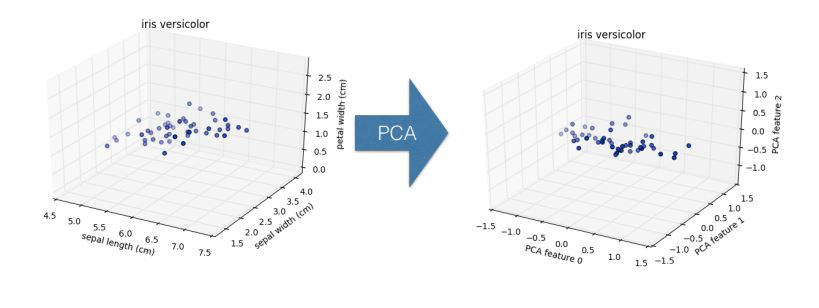

#### PCA features are ordered by variance descending
- The PCA features are in a special order. 
- Here is a bar graph showing the variance of each of the PCA features. 
- As you can see, each PCA feature has less variance than the last, and in this case the last PCA feature has very low variance. 
- This agrees with the scatter plot of the PCA features, where the samples don't vary much in the vertical direction. 
- In the other two directions, however, the variance is apparent. 

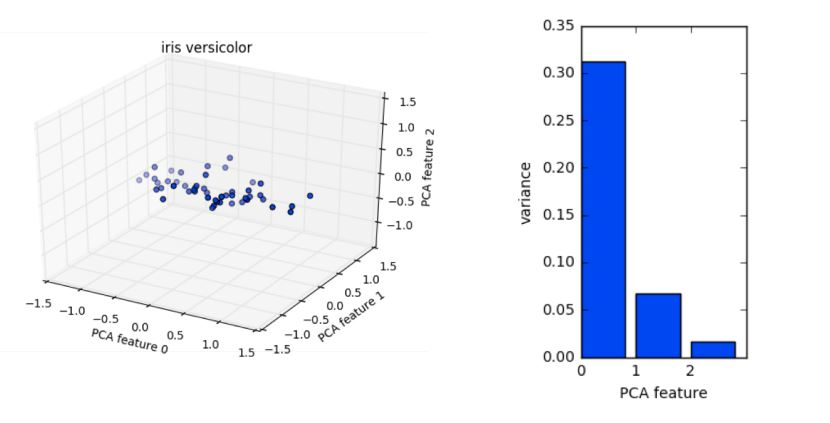

- **The intrinsic dimension is the number of PCA features that have significant variance.** 
- In our example, only the first two PCA features have significant variance. 
- So this dataset has intrinsic dimension 2, which agrees with what we observed when inspecting the scatter plot. 

#### Plotting the variances of PCA features

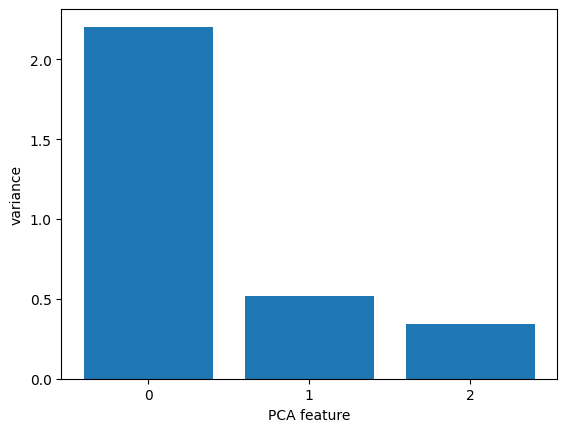

In [82]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
iris_pca = PCA()

# Create pipeline: pipeline
iris_pca_pipeline = make_pipeline(scaler, iris_pca)

# Fit the pipeline to 'samples'
iris_pca_pipeline.fit(irsi_pca)

# Plot the explained variances
iris_pca_features = range(iris_pca.n_components_)
plt.bar(iris_pca_features, iris_pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(range(iris_pca.n_components_))
plt.show()

#### Intrinsic dimension can be ambiguous

- The intrinsic dimension is a useful idea that helps to guide dimension reduction.
- However, it is not always unambiguous. 
- Here is a graph of the variances of the PCA features for the wine dataset. 
- We could argue for an intrinsic dimension of 2, of 3, or even more, depending upon the threshold you chose. 

In [83]:
wine.iloc[:, 2:14].head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93


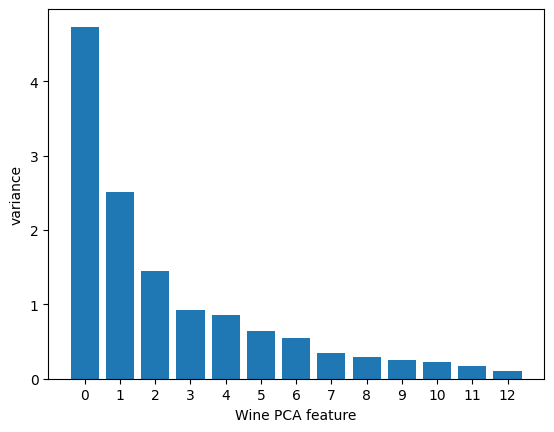

In [84]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
wine_pca = PCA()

# Create pipeline: pipeline
wine_pca_pipeline = make_pipeline(scaler, wine_pca)

wine_pca_pipeline.fit(wine.iloc[:, 2:15])

# Plot the explained variances
wine_pca_features = range(wine_pca.n_components_)
plt.bar(wine_pca_features, wine_pca.explained_variance_)
plt.xlabel('Wine PCA feature')
plt.ylabel('variance')
plt.xticks(wine_pca_features)
plt.show()

### C) Dimension reduction with PCA

- PCA features are in decreasing order of variance. 
- Assumes low variance features to be noise, 
- Retaining the higher variance assumed to be informative. 

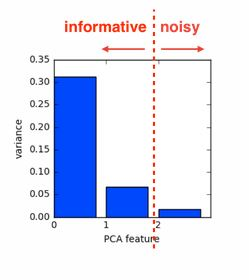

- To use PCA for dimension reduction, you need to specify how many PCA features to keep. 
- For example, `PCA(n_components=2)` when creating a PCA model 
- tells it to keep only the first two PCA features. 

A good choice is the intrinsic dimension of the dataset, if you know it. Let's consider an example right away. 

In [85]:
#The iris dataset has 4 features representing the 4 measurements.
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,labels,Species_code
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0,1


In [86]:
#Let's use PCA to reduce the dimension of the iris dataset to only 2
from sklearn.decomposition import PCA

In [87]:
iris_pca = PCA(n_components= 2)

In [88]:
iris_pca.fit(iris.iloc[:, 1:5])

PCA(n_components=2)

In [89]:
#Printing the shape of the transformed samples, 
transformed = iris_pca.transform(iris.iloc[:, 1:5])

In [90]:
transformed.shape

(150, 2)

**we see that there are only two features, as expected.**

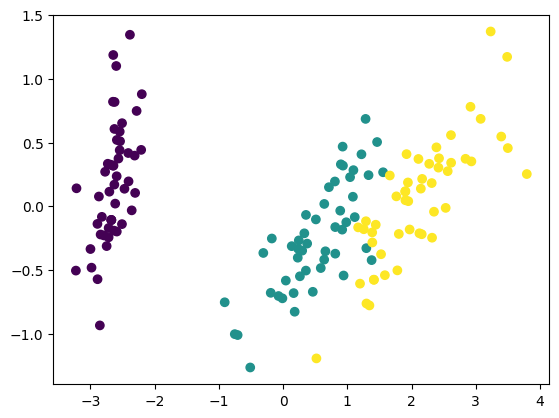

In [91]:
xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs, ys , c = iris['Species_code'])

- The species can still be distinguished. 
- Remember that PCA didn't even know that there were distinct species. 
- PCA simply took the 2 PCA features with highest variance. As we can see, these two features are very informative. 

### D) Word frequency arrays

- In some cases, an alternative implementation of PCA needs to be used. 
- Word frequency arrays are a great example. 
    - Each row corresponds to a document, 
    - Each column corresponds to a word from a fixed vocabulary. 
- The entries of the word-frequency array measure how often each word appears in each document.
- Only some of the words from the vocabulary appear in any one document, so most entries of the word frequency array are zero. 
- Arrays like this are said to be `"sparse"` - most entries are zeros
- Represented using a special type of array called a `"csr_matrix"`. 
- `csr_matrices` save space by remembering only the non-zero entries of the array. 
- Can use `scipy.sparse.csr_matrix` instead of np arrays
- Scikit-learn's PCA doesn't support `csr_matrices`, and you'll need to use `TruncatedSVD` instead. 
- `TruncatedSVD` performs the same transformation as `PCA`, but accepts csr matrices as input. 
- Other than that, you interact with `TruncatedSVD` and `PCA` in exactly the same way. 

**Example: Create a tf-idf word frequency array for a toy collection of documents.**

For this, use the TfidfVectorizer from sklearn. It transforms a list of documents into a word frequency array, which it outputs as a csr_matrix. It has fit() and transform() methods like other sklearn objects.

You are given a list documents of toy documents about pets.

In [92]:
documents = ['cats say meow', 'dogs say woof', 'dogs chase cats']

In [93]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer: tfidf
tfidf = TfidfVectorizer() 

# Apply fit_transform to document: csr_mat
csr_mat = tfidf.fit_transform(documents)

# Print result of toarray() method
print(csr_mat.toarray())

[[0.51785612 0.         0.         0.68091856 0.51785612 0.        ]
 [0.         0.         0.51785612 0.         0.51785612 0.68091856]
 [0.51785612 0.68091856 0.51785612 0.         0.         0.        ]]


In [94]:
# Get the words: words
words = tfidf.get_feature_names_out()

# Print words
print(words)

['cats' 'chase' 'dogs' 'meow' 'say' 'woof']


**Example: Clustering Wikipedia**
Combine your knowledge of TruncatedSVD and k-means to cluster some popular pages from Wikipedia.

To preprocess `wikipedia-vectors.csv` into the format in which you used it in the exercises, you have to take its transpose

The reason for taking this transpose is that without it, there would be 13,000 columns (corresponding to the 13,000 words in the file), which is a lot of columns for a CSV to have.


In [95]:
import pandas as pd
from scipy.sparse import csr_matrix

df = pd.read_csv('DataSet\Wikipedia articles\wikipedia-vectors.csv', index_col=0)
articles = csr_matrix(df.transpose())
titles = list(df.columns)

In [96]:
df.head()

,HTTP 404,Alexa Internet,Internet Explorer,HTTP cookie,Google Search,Tumblr,Hypertext Transfer Protocol,Social search,Firefox,LinkedIn,...,Chad Kroeger,Nate Ruess,The Wanted,Stevie Nicks,Arctic Monkeys,Black Sabbath,Skrillex,Red Hot Chili Peppers,Sepsis,Adam Levine
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.008878,0.0,0.0,0.049502,0.000000,0.00000,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00611,0.0
2,0.0,0.029607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.005646,0.00000,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0


In [97]:
df.shape

(13125, 60)

In [98]:
df.transpose().shape

(60, 13125)

In [99]:
articles[1,:]

<1x13125 sparse matrix of type '<class 'numpy.float64'>'
	with 259 stored elements in Compressed Sparse Row format>

In [100]:
titles

['HTTP 404',
 'Alexa Internet',
 'Internet Explorer',
 'HTTP cookie',
 'Google Search',
 'Tumblr',
 'Hypertext Transfer Protocol',
 'Social search',
 'Firefox',
 'LinkedIn',
 'Global warming',
 'Nationally Appropriate Mitigation Action',
 'Nigel Lawson',
 'Connie Hedegaard',
 'Climate change',
 'Kyoto Protocol',
 '350.org',
 'Greenhouse gas emissions by the United States',
 '2010 United Nations Climate Change Conference',
 '2007 United Nations Climate Change Conference',
 'Angelina Jolie',
 'Michael Fassbender',
 'Denzel Washington',
 'Catherine Zeta-Jones',
 'Jessica Biel',
 'Russell Crowe',
 'Mila Kunis',
 'Dakota Fanning',
 'Anne Hathaway',
 'Jennifer Aniston',
 'France national football team',
 'Cristiano Ronaldo',
 'Arsenal F.C.',
 'Radamel Falcao',
 'Zlatan Ibrahimović',
 'Colombia national football team',
 '2014 FIFA World Cup qualification',
 'Football',
 'Neymar',
 'Franck Ribéry',
 'Tonsillitis',
 'Hepatitis B',
 'Doxycycline',
 'Leukemia',
 'Gout',
 'Hepatitis C',
 'Predniso

In [101]:
# try csr_matrix data with TruncatedSVD
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD (n_components=50)
svd.fit(articles)
svd.n_components

50

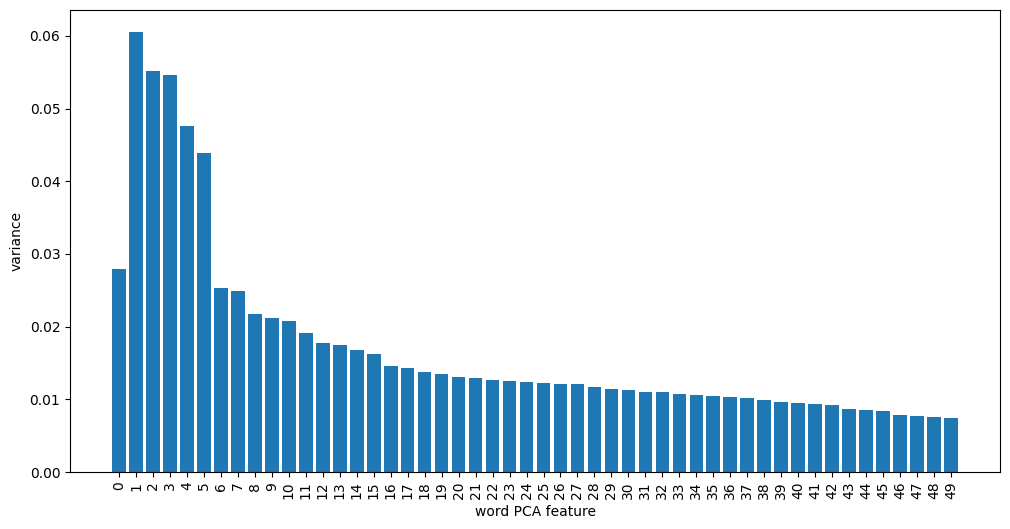

In [102]:
plt.figure(figsize = (12,6))
plt.bar(range(svd.n_components), svd.explained_variance_)
plt.xlabel('word PCA feature')
plt.ylabel('variance')
#plt.xticks(range(svd.n_components), rotation=20)
plt.xticks(range(svd.n_components), rotation=90)
plt.show()

In [103]:
# Perform the necessary imports
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

# Create a TruncatedSVD instance: svd
svd = TruncatedSVD (n_components=50)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters= 6)

# Create a pipeline: pipeline
pipeline = make_pipeline(svd, kmeans)

You are given an array articles of tf-idf word-frequencies of some popular Wikipedia articles, and a list titles of their titles.

Use your pipeline to cluster the Wikipedia articles.

In [104]:
# Fit the pipeline to articles
pipeline.fit(articles)

# Calculate the cluster labels: labels
wiki_labels = pipeline.predict(articles)

# Create a DataFrame aligning labels and titles: df
word_df = pd.DataFrame({'label': wiki_labels, 'article': titles})

# Display df sorted by cluster label
print(word_df.sort_values('label'))


    label                                        article
47      0                                          Fever
40      0                                    Tonsillitis
41      0                                    Hepatitis B
42      0                                    Doxycycline
43      0                                       Leukemia
44      0                                           Gout
45      0                                    Hepatitis C
46      0                                     Prednisone
49      0                                       Lymphoma
48      0                                     Gabapentin
58      1                                         Sepsis
59      1                                    Adam Levine
50      1                                   Chad Kroeger
51      1                                     Nate Ruess
52      1                                     The Wanted
53      1                                   Stevie Nicks
54      1                      

In [105]:
#cluster counts
word_df['label'].value_counts()

label
4    10
3    10
2    10
5    10
0    10
1    10
Name: count, dtype: int64

- Take a look at the cluster labels and see if you can identify any patterns!
- You can reduce n_components to 6 and receive same result

# `4-` Discovering Interpretable Features

## A) Non-negative matrix factorization (NMF)

Expresses samples as combinations of interpretable parts. 

For example, it expresses documents as combinations of topics, and images in terms of commonly occurring visual patterns. You'll also learn to use NMF to build recommender systems that can find you similar articles to read, or musical artists that match your listening history!

- NMF, like PCA, is a dimension reduction technique.
- In constract to PCA, however, NMF models are interpretable. 
- This means an NMF models are easier to understand yourself, and much easier for you to explain to others. 
- NMF can not be applied to every dataset, however. It is required that the sample features be "non-negative", so greater than or equal to 0. 

- NMF achieves its interpretability by decomposing samples as sums of their parts. 
- For example, NMF decomposes image as combinations of patterns themes.

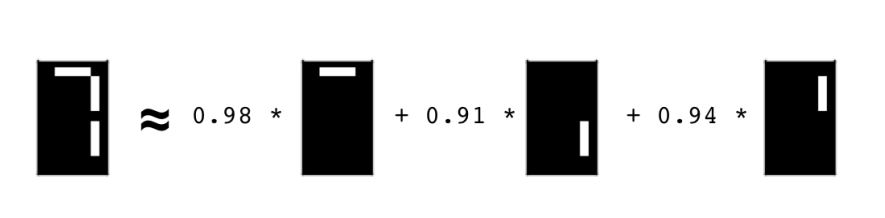

#### Using scikit-learn NMF
- Follows fit() / transform() pattern
- Must specify number of components e.g. NMF(n_components = 4)
- Working with NumPy arrays and csr_matrix

#### Example word-frequency array

- Dataset have only 4 words in the vocabulary, and these correspond to the four columns of the word-frequency array. 
- Each row represents a document, and the entries of 
- The array measure the frequency of each word in the document using what's known as "tf-idf". 
    - "tf" is the frequency of the word in the document. 
        - So if 10% of the words in the document are "datacamp", then the tf of "datacamp" for that document is 0.1. 
    - "idf" is a weighting scheme that reduces the influence of frequent words like "the". 

In [106]:
# Import NMF
from sklearn.decomposition import NMF

# Create an NMF instance: model
nmf_model = NMF(n_components = 6)

# Fit the model to articles
nmf_model.fit(articles)

# Transform the articles: nmf_features
nmf_features = nmf_model.transform(articles)

nmf_model.components_

array([[1.15094665e-02, 1.22391381e-03, 0.00000000e+00, ...,
        0.00000000e+00, 4.28376410e-04, 0.00000000e+00],
       [0.00000000e+00, 9.60824037e-06, 5.69496705e-03, ...,
        2.82856692e-03, 2.99001505e-04, 0.00000000e+00],
       [0.00000000e+00, 8.34889179e-06, 0.00000000e+00, ...,
        0.00000000e+00, 1.43954103e-04, 0.00000000e+00],
       [4.17531208e-03, 0.00000000e+00, 3.07649612e-03, ...,
        1.75363038e-03, 6.76490850e-03, 0.00000000e+00],
       [0.00000000e+00, 5.70972404e-04, 4.94030594e-03, ...,
        1.92514415e-04, 1.35764815e-03, 0.00000000e+00],
       [1.38884140e-04, 0.00000000e+00, 8.78419342e-03, ...,
        2.41058063e-03, 1.68917180e-03, 0.00000000e+00]])

In [107]:
nmf_model.components_.shape

(6, 13125)

Just as PCA has principal components, NMF has components which it learns from the samples, and as with PCA, the dimension of the components is the same as the dimension of the samples. 

In our example, for instance, there are 6 components, and they live in 4 dimensional space, corresponding to the 60 words in the vocabulary. The entries of the NMF components are always non-negative.

In [108]:
# Print the NMF features
print(nmf_features.round(2))

[[0.   0.   0.   0.   0.   0.44]
 [0.   0.   0.   0.   0.   0.56]
 [0.   0.   0.   0.   0.   0.4 ]
 [0.   0.   0.   0.   0.   0.38]
 [0.   0.   0.   0.   0.   0.48]
 [0.01 0.01 0.01 0.03 0.   0.33]
 [0.   0.   0.02 0.   0.01 0.36]
 [0.   0.   0.   0.   0.   0.49]
 [0.02 0.01 0.   0.02 0.03 0.48]
 [0.01 0.03 0.03 0.07 0.02 0.34]
 [0.   0.   0.53 0.   0.03 0.  ]
 [0.   0.   0.35 0.   0.   0.  ]
 [0.01 0.01 0.31 0.06 0.01 0.02]
 [0.   0.01 0.34 0.01 0.   0.  ]
 [0.   0.   0.43 0.   0.04 0.  ]
 [0.   0.   0.48 0.   0.   0.  ]
 [0.01 0.02 0.37 0.03 0.   0.01]
 [0.   0.   0.48 0.   0.   0.  ]
 [0.   0.01 0.55 0.   0.   0.  ]
 [0.   0.   0.46 0.   0.   0.  ]
 [0.   0.01 0.02 0.51 0.06 0.01]
 [0.   0.   0.   0.51 0.   0.  ]
 [0.   0.01 0.   0.42 0.   0.  ]
 [0.   0.   0.   0.43 0.   0.  ]
 [0.   0.   0.   0.49 0.   0.  ]
 [0.1  0.09 0.   0.38 0.   0.01]
 [0.   0.   0.   0.57 0.   0.01]
 [0.01 0.01 0.   0.47 0.   0.01]
 [0.   0.   0.   0.57 0.   0.  ]
 [0.   0.   0.   0.52 0.01 0.01]
 [0.   0.4

####  let's explore the meaning of these features 

- The NMF feature values are non-negative, as well. As we saw with PCA, 
- Our transformed data in this example will have six columns, corresponding to our six new features. 
- The features and the components of an NMF model can be combined to approximately reconstruct the original data samples. 

In [109]:
# Create a pandas DataFrame: df
df = pd.DataFrame(nmf_features, index = titles)

# Print the row for 'Anne Hathaway'
print(df.loc['Anne Hathaway'])

# Print the row for 'Denzel Washington'
print(df.loc['Denzel Washington'])

0    0.003815
1    0.000000
2    0.000000
3    0.571863
4    0.000000
5    0.000000
Name: Anne Hathaway, dtype: float64
0    0.000000
1    0.005575
2    0.000000
3    0.419561
4    0.000000
5    0.000000
Name: Denzel Washington, dtype: float64


- Notice that for both actors, the NMF feature 3 has by far the highest value. 
- This means that both articles are reconstructed using mainly the 3rd NMF component.

#### Reconstruction of a sample

- Let's see how this works with a single data sample. 
- Here is a sample representing a document from our toy dataset 
- Get NMF feature values. 
- Now if we multiply each NMF components by the corresponding NMF feature value, and add up each column, we get something very close to the original sample. 

In [110]:
test_samples = [[1, 0.5 ,0 ],
            [0.2,0.1, 2.1]]

In [111]:
# Create an NMF instance: model

test_model = NMF(n_components = 2)

# Fit the model to articles
test_model.fit(test_samples)

# Transform the articles: nmf_features
test_nmf_features = test_model.transform(test_samples)

test_model.components_

array([[0.00000000e+00, 0.00000000e+00, 1.79087764e+00],
       [1.26995344e+00, 6.34976719e-01, 1.05955294e-07]])

In [112]:
test_nmf_features

array([[0.        , 0.78743044],
       [1.17260942, 0.15748609]])

In [113]:
#first row of features * components = fist row of samples
np.round((test_nmf_features [0,0] * test_model.components_ [0, :]) + (test_nmf_features [0,1] * test_model.components_ [1, :]),2)

array([1. , 0.5, 0. ])

In [114]:
#2nd row of features * components = 2nd row of samples
np.round((test_nmf_features [1,0] * test_model.components_ [0, :]) + (test_nmf_features [1,1] * test_model.components_ [1, :]),2)

array([0.2, 0.1, 2.1])

- So a sample can be reconstructed by multiplying the NMF components by the NMF feature values of the sample, and adding up. 
- This calculation also can be expressed as what is known as a product of matrices. 
- We won't be using that point of view, but that's where the "matrix factorization", or "MF", in NMF comes from.

- There are many other great examples as non-negative arrays as well, such as
    - arrays encoding collections of images
    - arrays encoding audio spectrograms
    - arrays representing the purchase histories on e-Commerce sites. 

## B) NMF learns interpretable parts

- We'll learn that the components of NMF represent patterns that frequently occur in the samples.
- Back to our example as we have 
    - 13125 documents
    - 60 words
    - n_compenents = 6

In [115]:
df = pd.read_csv('DataSet\Wikipedia articles\wikipedia-vectors.csv', index_col=0)
df.head()

,HTTP 404,Alexa Internet,Internet Explorer,HTTP cookie,Google Search,Tumblr,Hypertext Transfer Protocol,Social search,Firefox,LinkedIn,...,Chad Kroeger,Nate Ruess,The Wanted,Stevie Nicks,Arctic Monkeys,Black Sabbath,Skrillex,Red Hot Chili Peppers,Sepsis,Adam Levine
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.008878,0.0,0.0,0.049502,0.000000,0.00000,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00611,0.0
2,0.0,0.029607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.005646,0.00000,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0


In [116]:
from sklearn.decomposition import NMF

# Create an NMF instance: model
model = NMF(n_components = 6)

# Fit the model to articles
model.fit(df)

# Transform the articles: nmf_features
nmf_features = model.transform(df)


In [117]:
#The 6 components are stored as the 6 rows of a 2-dimensional numpy array. 
model.components_.shape

(6, 60)

- The rows, or components, live in an 60-dimensional space - 
- There is one dimension for each of the words. 
- Aligning the words of our vocabulary with the columns of the NMF components allows them to be interpreted.
- Choosing a component, such as first one, and looking at which words have the highest values,
- we see that they fit a theme: the words are 'Radamel Falcao', 'Franck Ribéry', 'Zlatan Ibrahimović, 'Cristiano Ronaldo' and 'Neymar'.
- The same happens if any other component is considered.


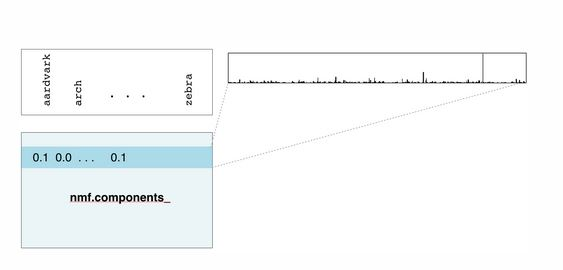

In [118]:
# Create a DataFrame: components_df
components_df = pd.DataFrame(model.components_, columns = df.columns)

# Print the shape of the DataFrame
print(components_df.shape)

# Select row 3: component
component = components_df.iloc[1,:]

# Print result of nlargest
print(component.nlargest())

(6, 60)
Radamel Falcao        0.565250
Franck Ribéry         0.563414
Zlatan Ibrahimović    0.533690
Cristiano Ronaldo     0.533047
Neymar                0.409835
Name: 1, dtype: float64


### NMF components

- So if NMF is applied to documents, 
    - then the components reprsent to topics, 
    - The NMF features combine the topics to documents.
- If NMF is applied to a collection of images
    - NMF components are parts of image (represent patterns that frequently occur in the images).
    - for Example, NMF decomposes images from an LCD display into the individual cells of the display.

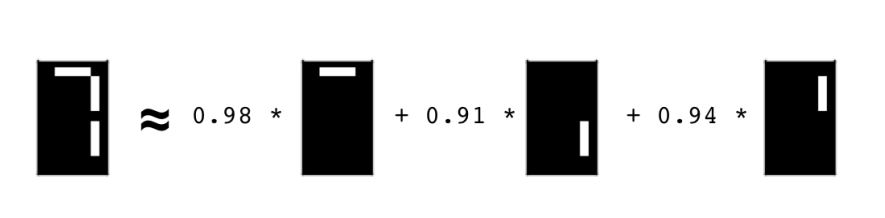

 To do this, you'll need to know how to represent a collection of images as a non-negative array. 

### Grayscale images

- "grayscale image"  = no colors, all the pixels are shades of gray ranging from black to white 
- Since there are only shades of grey, a grayscale image can be encoded by the brightness of every pixel. 
- Representing the brightness as a number between 0 and 1, where 0 is totally black and 1 is totally white, 
- the image can be represented as 2-dimensional array of numbers. 

#### Here, for example, is a grayscale photo of the moon! 

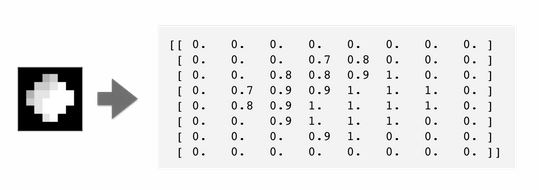

#### Grayscale images as flat arrays

These 2-dimensional arrays of numbers can then be flattened by 
- enumerating the entries. 
- row-by-row.
- from left-to-right and top to bottom.

The grayscale image is now represented by a flat array of non-negative numbers. 

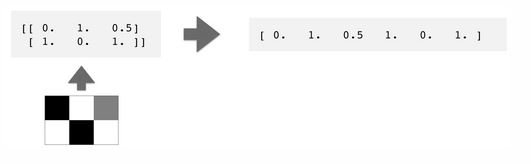

#### Encoding a collection of images

- A collection of grayscale images of the same size can thus be encoded as a 2-dimensional array. 
- Each row represents an image as a flattened array.
- Each column represents a pixel.

**This structure remeber us with NMF as**

- Viewing images as samples, and pixels as features, we see that the data is arranged similarly to the word frequency array. 
- Indeed, the entries of this array are non-negative, 
- so NMF can be used to learn the parts of the images. 

#### Visualizing samples

To recover the image, 
- Use the reshape method of the sample, specifying the dimensions of the original image as a tuple. 
- Pass the 2-dimensional array to the plt dot imshow function. 

In [119]:
image_sample = np.array([1, 0, 1, 0, 0.5, 0])

In [120]:
bitmap = image_sample.reshape((2,3))

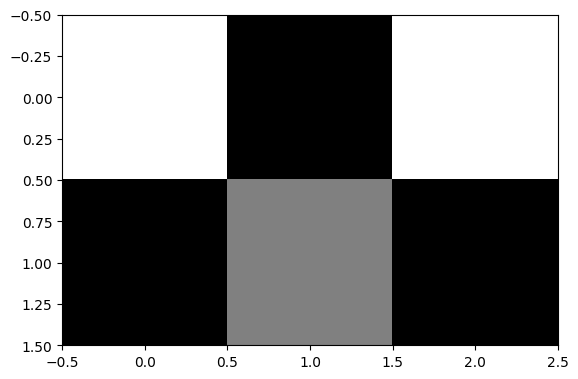

In [121]:
plt.imshow(bitmap, cmap = 'gray', interpolation='nearest')

In [122]:
lcd_images = pd.read_csv('DataSet/lcd-digits.csv', header=None)

In [123]:
lcd_images

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


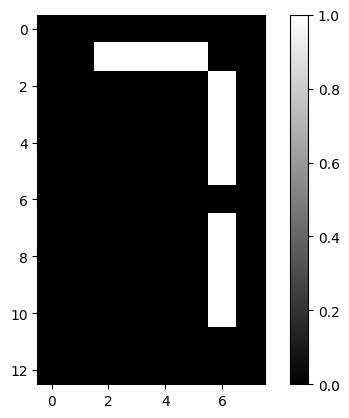

In [124]:
#Select the 0th row: digit
digit = lcd_images.iloc[0,:]
digit = np.array(digit)

# Print digit
print(digit)

# Reshape digit to a 13x8 array: bitmap
bitmap = digit.reshape(13,8)

# Print bitmap
print(bitmap)

# Use plt.imshow to display bitmap
plt.imshow(bitmap, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.show()

### NMF learns the parts of images

Now use what you've learned about NMF to decompose the digits dataset. You are again given the digit images as a 2D array image samples

In [125]:
def show_as_image(sample):
    bitmap = sample.reshape((13, 8))
    plt.figure()
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()
    

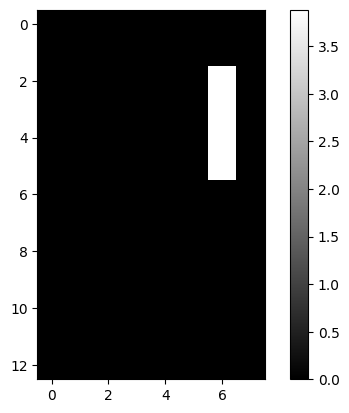

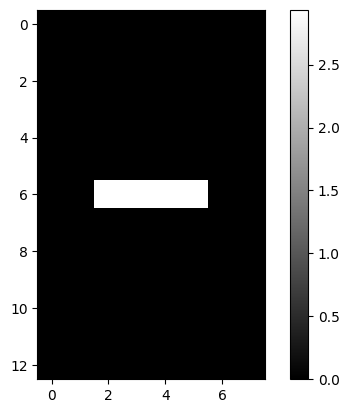

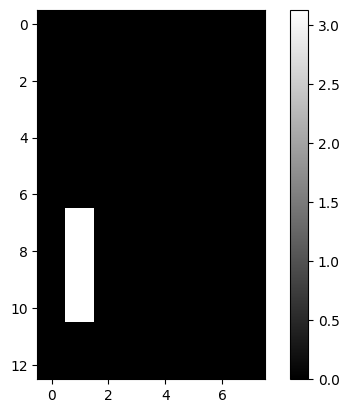

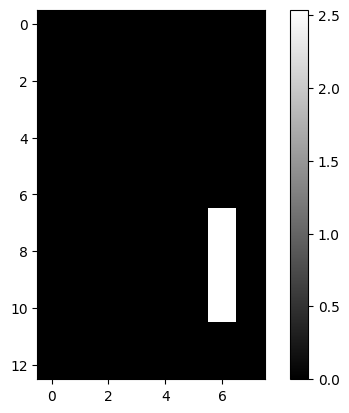

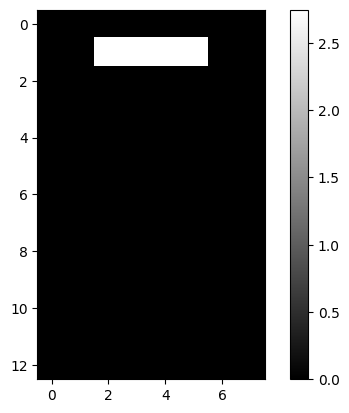

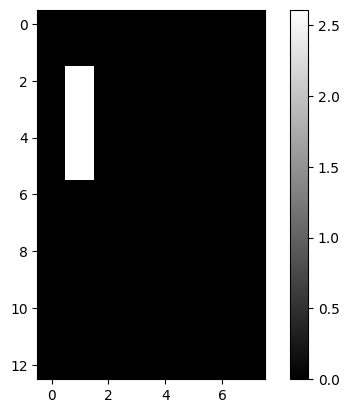

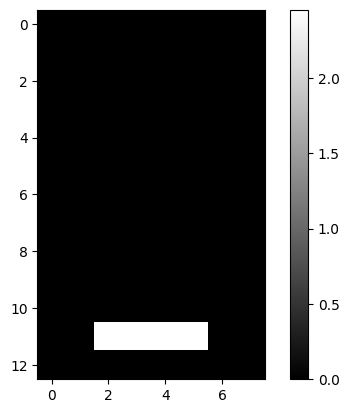

[2.57347960e-01 0.00000000e+00 0.00000000e+00 3.94333376e-01
 3.64045642e-01 0.00000000e+00 3.51281573e-14]


In [126]:
# Import NMF
from sklearn.decomposition import NMF

# Create an NMF model: model
#7 is the number of cells in an LED display).
image_model = NMF(n_components = 7)

lcd_images_array = lcd_images.to_numpy()

# Apply fit_transform to samples: features
image_features = image_model.fit_transform(lcd_images_array)

# Call show_as_image on each component
for component in image_model.components_:
    show_as_image(component)

# Select the 0th row of features: digit_features
digit_features = image_features[0]

# Print digit_features
print(digit_features)

 look through the plots and notice how NMF has expressed the digit as a sum of the components!

### PCA doesn't learn parts

- Unlike NMF, PCA doesn't learn the parts of things. 
- Its components do not correspond to topics (in the case of documents) or to parts of images, when trained on images. 

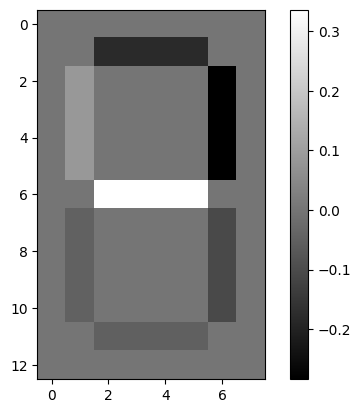

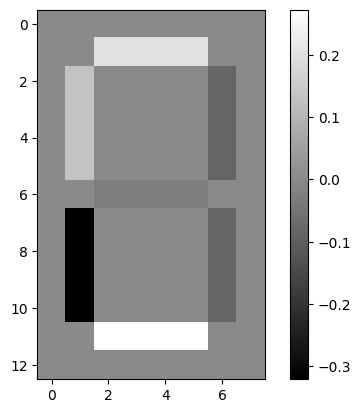

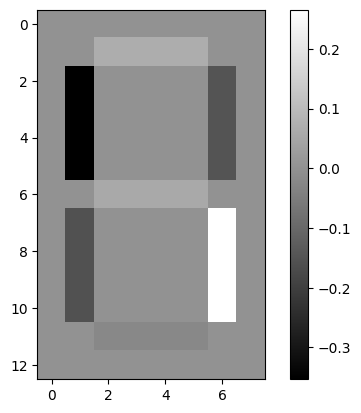

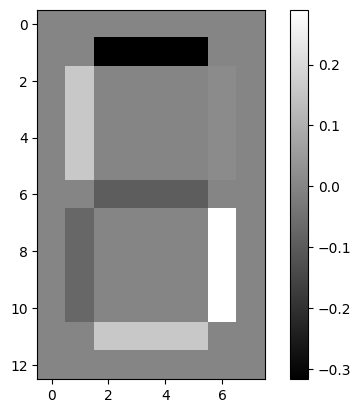

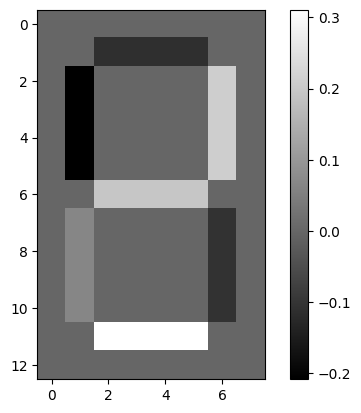

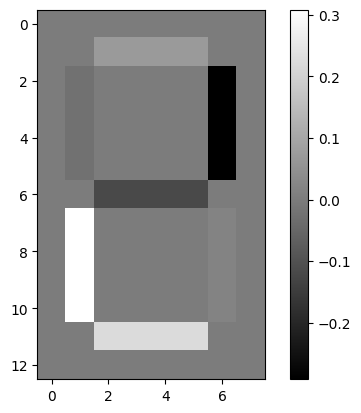

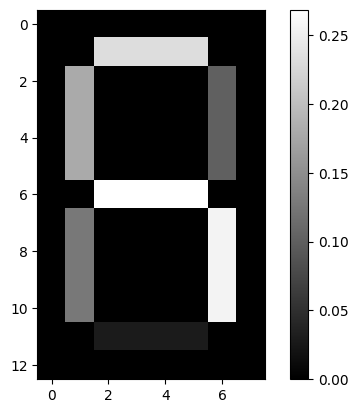

In [127]:
# Import PCA
from sklearn.decomposition import PCA

# Create a PCA instance: model
image_model_pca = PCA(n_components = 7)

# Apply fit_transform to samples: features
image_features_pca = image_model_pca.fit_transform(lcd_images_array)

# Call show_as_image on each component
for component in image_model_pca.components_:
    show_as_image(component)
    

Notice that the components of PCA do not represent meaningful parts of images of LED digits

### C) Building recommender systems using NMF

**Task:**
- Find recommended articles that are similar to the article currently being read by a customer
    - Similar articles should have similar topics

**Strategy:**
- Apply NMF to the word-frequency array of the articles 
- Use the resulting NMF features that describe the topic mixture of an article. 
- So similar articles will have similar NMF features. 

But how can two articles be compared using their NMF features? 

### Versions of articles

- Similar documents have similar topics, but it isn't always the case that the NMF feature values are exactly the same. 
    - For instance, one version of a document might use very direct language,

- whereas other versions might interleave the same content with meaningless chatter. 
    - Meaningless chatter reduces the frequency of the topic words overall, 
    - which reduces the values of the NMF features representing the topics.

However, on a scatter plot of the NMF features, all these versions lie on a single line passing through the origin. 

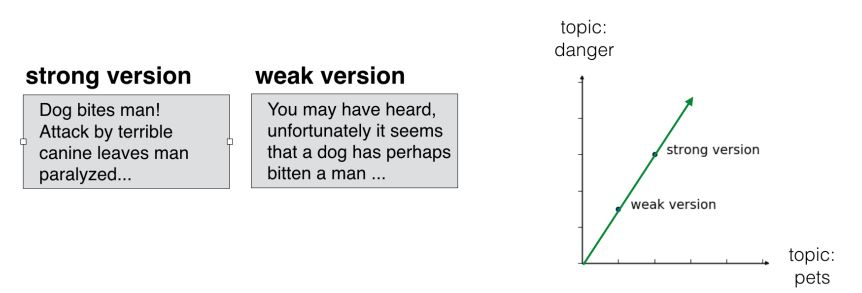

###  Cosine similarity

- For this reason, when comparing two documents, it's a good idea to compare these lines. 
- We'll compare them using what is known as the cosine similarity, which uses the angle between the two lines. 
- Higher values indicate greater similarity.
- The technical definition of the cosine similarity is out the scope of this course, but we've already gained an intuition. 

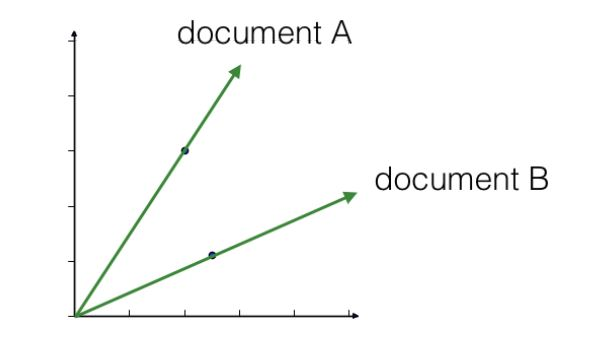

In [128]:
df.head()

,HTTP 404,Alexa Internet,Internet Explorer,HTTP cookie,Google Search,Tumblr,Hypertext Transfer Protocol,Social search,Firefox,LinkedIn,...,Chad Kroeger,Nate Ruess,The Wanted,Stevie Nicks,Arctic Monkeys,Black Sabbath,Skrillex,Red Hot Chili Peppers,Sepsis,Adam Levine
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.008878,0.0,0.0,0.049502,0.000000,0.00000,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00611,0.0
2,0.0,0.029607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.005646,0.00000,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0


In [129]:
df.shape

(13125, 60)

In [130]:
articles.shape

(60, 13125)

In [131]:
from sklearn.decomposition import NMF

# Create an NMF instance: model
model = NMF(n_components = 6)

# Fit the model to articles
model.fit(articles)

# Transform the articles: nmf_features
nmf_features = model.fit_transform(articles)

In [132]:
nmf_features.shape

(60, 6)

In [133]:
from sklearn.preprocessing import normalize
norm_features = normalize(nmf_features)

In [134]:
titles[23]

'Catherine Zeta-Jones'

In [135]:
current_article = norm_features[23, :]

similarities = norm_features.dot(current_article)
similarities

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 9.89235590e-02, 0.00000000e+00, 0.00000000e+00,
       4.89843360e-02, 1.88065304e-01, 0.00000000e+00, 0.00000000e+00,
       1.90663528e-01, 3.22592154e-02, 0.00000000e+00, 0.00000000e+00,
       8.58003484e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       9.92343561e-01, 1.00000000e+00, 9.99911470e-01, 1.00000000e+00,
       1.00000000e+00, 9.45700873e-01, 9.99921336e-01, 9.99047660e-01,
       9.99977286e-01, 9.99323110e-01, 0.00000000e+00, 1.02532184e-02,
       7.01606583e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.07965637e-01, 5.18975627e-02, 3.64605071e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.03971217e-02,
       1.08275759e-03, 0.00000000e+00, 0.00000000e+00, 9.99625157e-04,
       3.11484059e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.26526032e-02, 9.89528070e-02, 0.00000000e+00, 0.00000000e+00,
      

In [136]:
df_2 = pd.DataFrame(norm_features, index = titles)

In [137]:
df_2

,0,1,2,3,4,5
HTTP 404,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
Alexa Internet,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
Internet Explorer,0.009511,0.000000,0.000000,0.000000,0.000000,0.999955
HTTP cookie,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
Google Search,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
Tumblr,0.038126,0.040896,0.023034,0.098924,0.000000,0.993256
Hypertext Transfer Protocol,0.000000,0.000000,0.057400,0.000000,0.016793,0.998210
Social search,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
Firefox,0.031725,0.029537,0.007796,0.048984,0.054363,0.996346
LinkedIn,0.031895,0.089970,0.088802,0.188065,0.056420,0.971828


In [138]:
df_2.loc['Catherine Zeta-Jones']

0    0.0
1    0.0
2    0.0
3    1.0
4    0.0
5    0.0
Name: Catherine Zeta-Jones, dtype: float64

In [139]:
current_article_2 = df_2.loc['Catherine Zeta-Jones']

In [140]:
similarities = df_2.dot(current_article)
similarities

HTTP 404                                         0.000000
Alexa Internet                                   0.000000
Internet Explorer                                0.000000
HTTP cookie                                      0.000000
Google Search                                    0.000000
Tumblr                                           0.098924
Hypertext Transfer Protocol                      0.000000
Social search                                    0.000000
Firefox                                          0.048984
LinkedIn                                         0.188065
Global warming                                   0.000000
Nationally Appropriate Mitigation Action         0.000000
Nigel Lawson                                     0.190664
Connie Hedegaard                                 0.032259
Climate change                                   0.000000
Kyoto Protocol                                   0.000000
350.org                                          0.085800
Greenhouse gas

In [141]:
similarities.nlargest()

Michael Fassbender      1.000000
Catherine Zeta-Jones    1.000000
Jessica Biel            1.000000
Anne Hathaway           0.999977
Mila Kunis              0.999921
dtype: float64

## Recommend popular music artists

In [142]:
from scipy.sparse import coo_matrix

musical = pd.read_csv('DataSet\Musical artists\scrobbler-small-sample.csv')
artists1 = musical.sort_values(['artist_offset', 'user_offset'], ascending=[True, True])
row_ind = np.array(artists1['artist_offset'])
col_ind = np.array(artists1['user_offset'])
data1 = np.array(artists1['playcount'])
artists = coo_matrix((data1, (row_ind, col_ind)))

In [143]:
musical.shape

(2894, 3)

In [144]:
row_ind

array([  0,   0,   0, ..., 110, 110, 110], dtype=int64)

In [145]:
artists

<111x500 sparse matrix of type '<class 'numpy.int64'>'
	with 2894 stored elements in COOrdinate format>

`artists` whose rows correspond to artists and whose columns correspond to users. The entries give the number of times each artist was listened to by each user.

In [146]:
# Perform the necessary imports
from sklearn.decomposition import NMF
from sklearn.preprocessing import Normalizer, MaxAbsScaler
from sklearn.pipeline import make_pipeline

# Create a MaxAbsScaler: scaler
scaler = MaxAbsScaler()

# Create an NMF model: nmf
nmf = NMF(n_components = 20)

# Create a Normalizer: normalizer
normalizer = Normalizer()

# Create a pipeline: pipeline
pipeline = make_pipeline(scaler, nmf, normalizer)

# Apply fit_transform to artists: norm_features
norm_features = pipeline.fit_transform(artists)


In [147]:
norm_features.shape

(111, 20)

In [148]:
artist_name_df = pd.read_csv('DataSet/Musical artists/artists.csv', header=None)
artist_name_df.shape

(111, 1)

In [149]:
artist_names = artist_name_df.values.reshape(111).tolist()

In [150]:
df_artist = pd.DataFrame(norm_features, index= artist_names)

# Select row of 'Bruce Springsteen': artist
artist = df_artist.loc['Bruce Springsteen']

# Compute cosine similarities: similarities
musical_similarities = df_artist.dot(artist)

# Display those with highest cosine similarity
print(musical_similarities.nlargest())

Bruce Springsteen    1.000000
Leonard Cohen        0.964468
Neil Young           0.952423
The Beach Boys       0.858195
Van Morrison         0.846892
dtype: float64
